#Question 1: Handling of Missing Values and Outliers

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
df = pd.read_csv("/content/larger_medical_dataset_500_hw1_q1.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      500 non-null    int64  
 1   age             500 non-null    int64  
 2   blood_pressure  450 non-null    float64
 3   cholesterol     460 non-null    float64
 4   weight          470 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 19.7 KB


,patient_id,age,blood_pressure,cholesterol,weight
0,1,24,102.8,174.7,67.3
1,2,41,137.8,183.1,70.7
2,3,37,NaN,231.1,76.2
3,4,45,82.7,252.4,63.7
4,5,51,117.7,202.3,69.7


In [87]:
from sklearn.impute import KNNImputer

imp = KNNImputer(n_neighbors=4)
df_imputed = pd.DataFrame(imp.fit_transform(df), columns=df.columns)

In [88]:
bp_mean = df_imputed['blood_pressure'].mean()
bp_std = df_imputed['blood_pressure'].std()

df_imputed['z_score_bp'] = (df_imputed['blood_pressure'] - bp_mean) / bp_std
outliers = df_imputed[np.abs(df_imputed['z_score_bp']) > 3]
print("Outliers in 'blood_pressure':")
print(outliers)


cholesterol_mean = df_imputed['cholesterol'].mean()
cholesterol_std = df_imputed['cholesterol'].std()

df_imputed['z_score_cholesterol'] = (df_imputed['cholesterol'] - cholesterol_mean) / cholesterol_std
outliers = df_imputed[np.abs(df_imputed['z_score_cholesterol']) > 3]
print("Outliers in 'cholesterol':")
print(outliers)

Outliers in 'blood_pressure':
     patient_id   age  blood_pressure  cholesterol  weight  z_score_bp
47         48.0  42.0            25.0        190.4   59.60   -3.764201
136       137.0  29.0           210.0        132.7   82.70    3.477183
149       150.0  32.0            30.0        182.0   55.80   -3.568488
208       209.0  38.0           220.0        166.0   55.40    3.868610
271       272.0  61.0           260.0        187.1   88.10    5.434314
345       346.0  56.0           270.0         81.3   76.40    5.825740
435       436.0  33.0           240.0        268.4   63.35    4.651462
446       447.0  59.0            35.0        294.0   66.00   -3.372774
448       449.0  64.0           290.0        231.4   92.60    6.608593
Outliers in 'cholesterol':
     patient_id   age  blood_pressure  cholesterol  weight  z_score_bp  \
51         52.0  22.0            94.5         72.0    72.5   -1.043789   
331       332.0  31.0           145.7         72.7    35.0    0.960313   

     z_sco

In [89]:
df_cleaned = df_imputed[np.abs(df_imputed['z_score_bp']) <= 3]
df_cleaned = df_cleaned.drop(columns=['z_score_bp'])

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

Question 2: Correlation Analysis and Feature Selection with Recursive Feature Elimination

In [91]:

df1 = pd.read_csv('/content/housing_data_hw1_q2.csv')
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   1000 non-null   int64  
 1   num_rooms               1000 non-null   int64  
 2   lot_size                1000 non-null   int64  
 3   year_built              1000 non-null   int64  
 4   proximity_to_amenities  1000 non-null   float64
 5   num_bathrooms           1000 non-null   int64  
 6   garage_size             1000 non-null   int64  
 7   has_pool                1000 non-null   int64  
 8   neighborhood_rating     1000 non-null   float64
 9   crime_rate              1000 non-null   float64
 10  school_quality          1000 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 86.1 KB


,price,num_rooms,lot_size,year_built,proximity_to_amenities,num_bathrooms,garage_size,has_pool,neighborhood_rating,crime_rate,school_quality
0,402822,2,8049,1989,0.99,3,0,1,8.6,0.12,3.1
1,257648,4,8318,2013,0.31,2,0,0,4.1,0.87,1.2
2,327235,7,15027,1989,0.13,3,1,0,1.7,0.93,3.0
3,347465,3,11292,1902,0.64,4,0,0,4.2,0.07,3.9
4,330320,10,9566,1925,0.38,4,0,1,8.9,0.85,2.1


In [92]:
correlation_matrix = df1.corr()
price_corr = correlation_matrix['price'].sort_values(ascending=False)

top_3_corr_features = price_corr[1:4]
print("Top 3 Corresponding Features:")
print(top_3_corr_features)

Top 3 Corresponding Features:
lot_size               0.064708
neighborhood_rating    0.036590
has_pool               0.030060
Name: price, dtype: float64


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df1.drop('price', axis=1)
y = df1['price']

model = LinearRegression()

rfe = RFE(model, n_features_to_select=5)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

rfe_features = X.columns[rfe.support_]
print("Selected top 5 features for predicting house prices:")
print(rfe_features)


[False False False  True  True  True  True False  True False]
[3 6 5 1 1 1 1 2 1 4]
Selected top 5 features for predicting house prices:
Index(['proximity_to_amenities', 'num_bathrooms', 'garage_size', 'has_pool',
       'crime_rate'],
      dtype='object')


*** Why the features selected by RFE might differ from those identified using correlation? **bold text**


Ans: Because correlation measure linear relationships between each individual feature and target, here it's house prices. And RFE uses model to to evaluate the importance of a feature, here it's linear regression. RFE focuses on imprving  model's predictive performance.
 while selectiong features RFEconsideres multicolinearity and correlation measure doesn't.
As RFE totally dosen't rely on the individual linear relationships, infact looks at predictive power with other features. Even low correlation features might be more importand in the model with or in combination of otherf features and vice versa.




Question 3: Data Visualization, PCA, Huffman Code, and Feature

In [94]:
df2 = pd.read_csv('/content/medical_data_hw1_q3.csv')
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10000 non-null  int64  
 1   BMI                10000 non-null  float64
 2   cholesterol        10000 non-null  int64  
 3   blood_pressure     10000 non-null  int64  
 4   smoking_habits     10000 non-null  int64  
 5   physical_activity  10000 non-null  float64
 6   medical_condition  10000 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 547.0 KB


,age,BMI,cholesterol,blood_pressure,smoking_habits,physical_activity,medical_condition
0,42,36.9,158,116,0,8.3,0
1,47,24.2,189,125,1,7.2,0
2,73,29.6,95,109,0,4.1,1
3,51,22.2,117,96,1,9.6,0
4,52,26.1,145,138,0,5.6,0


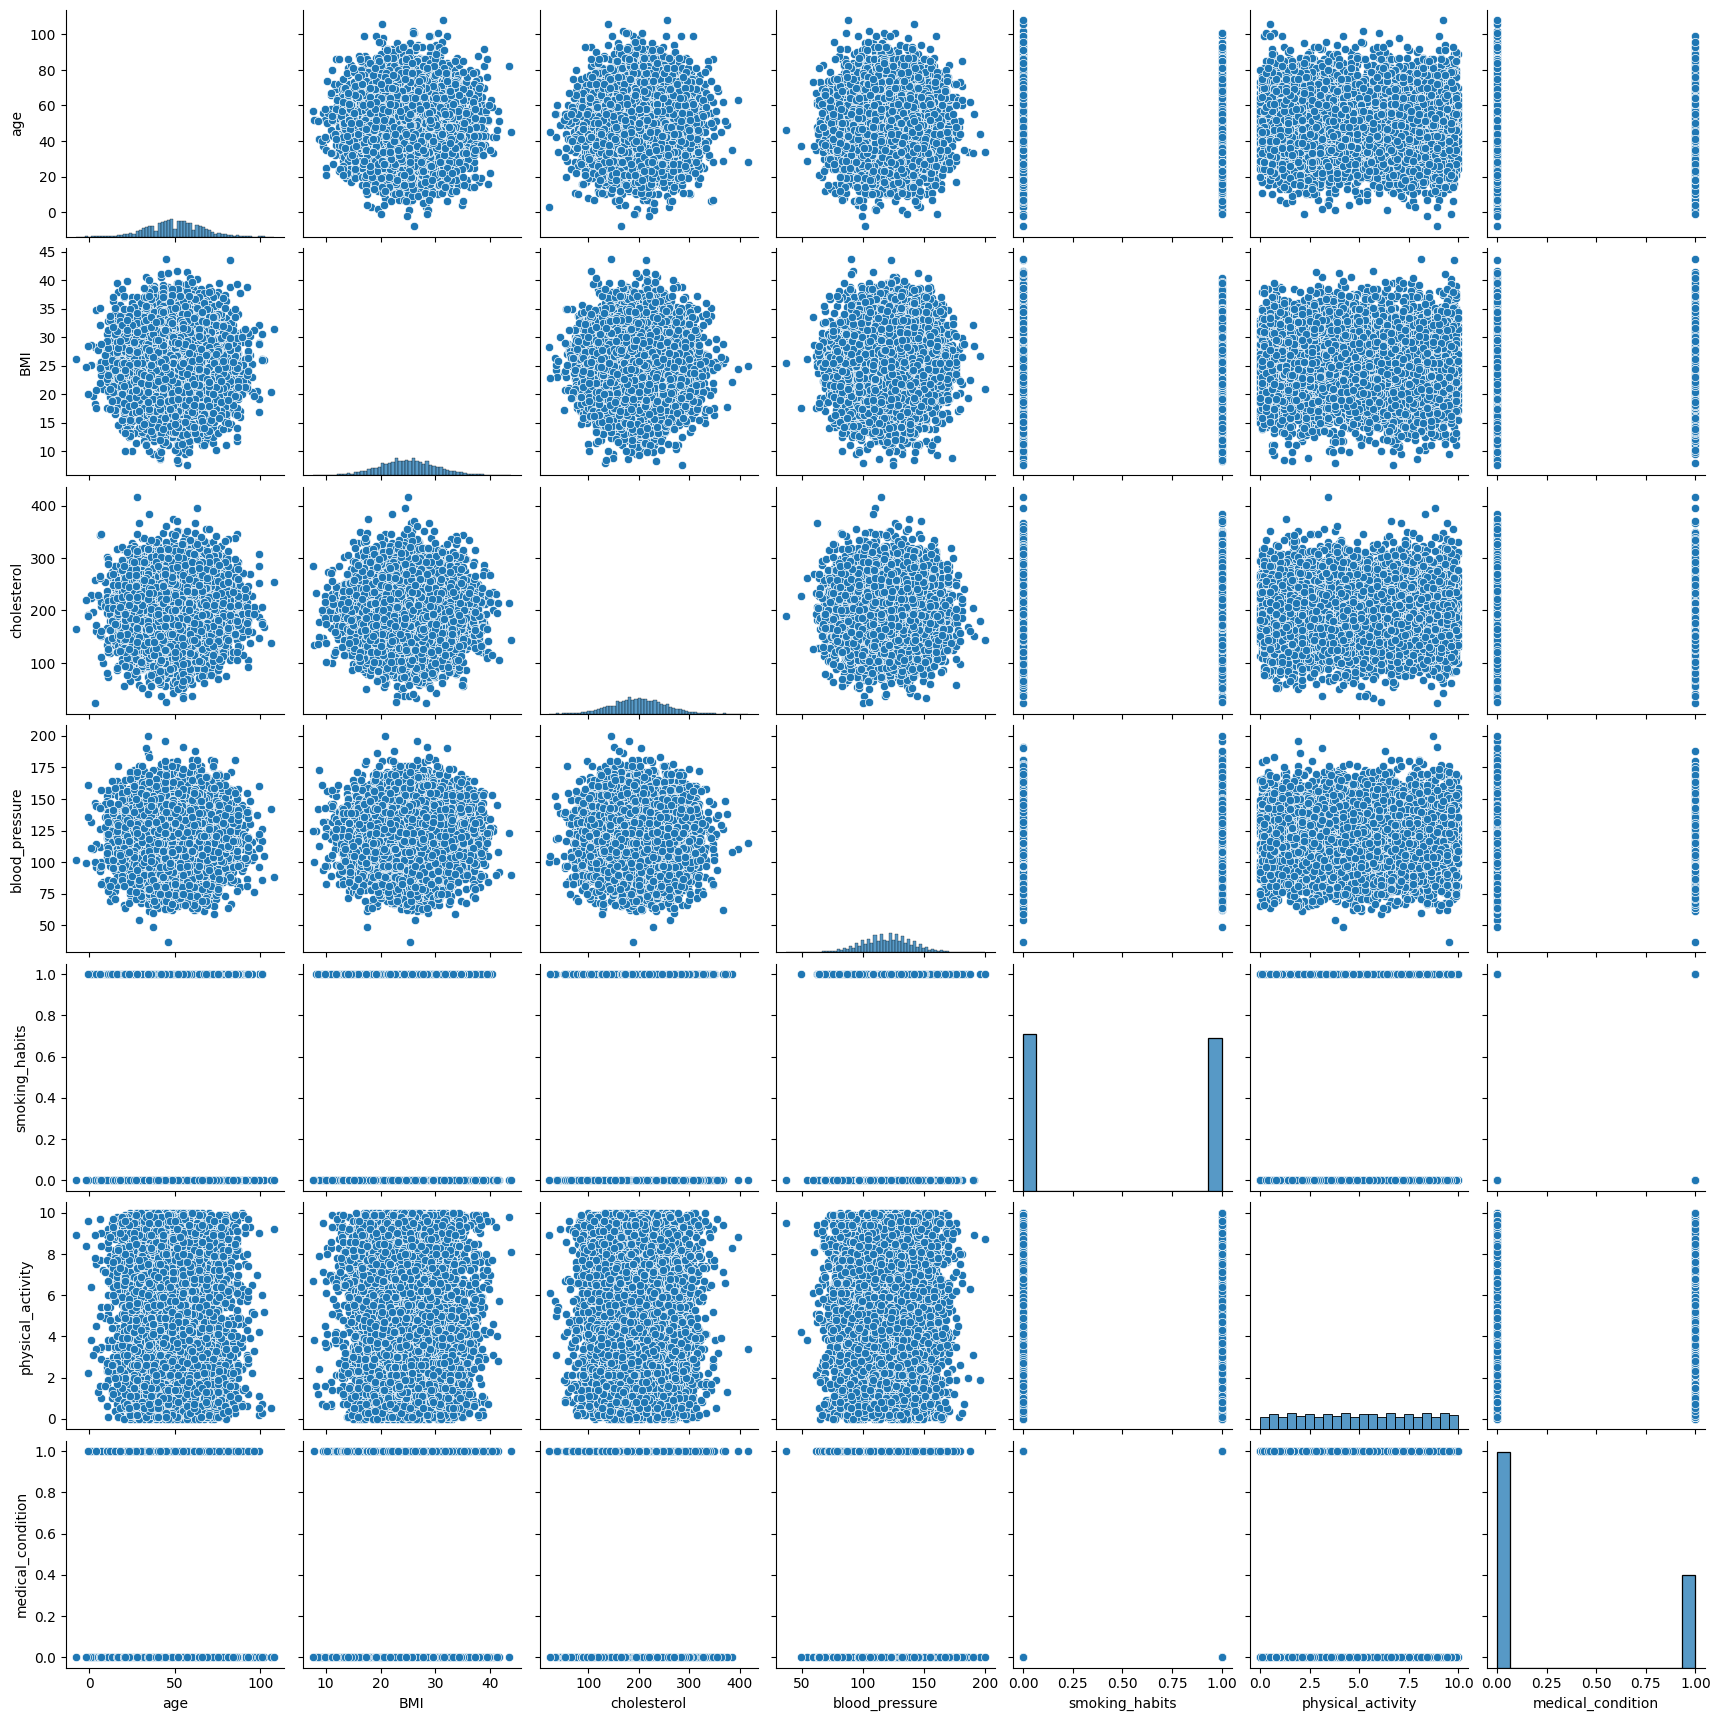

In [95]:
#pairplot
sns.pairplot(df2)


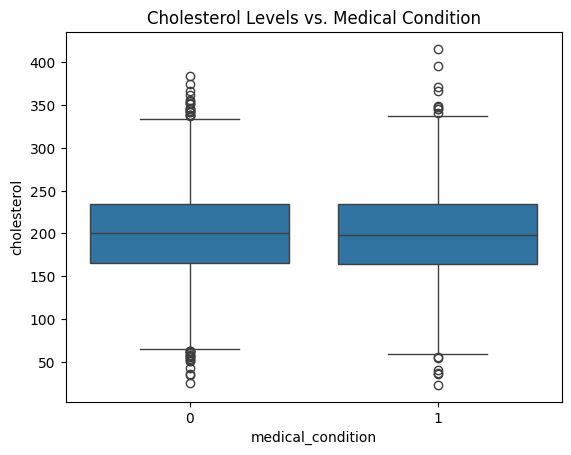

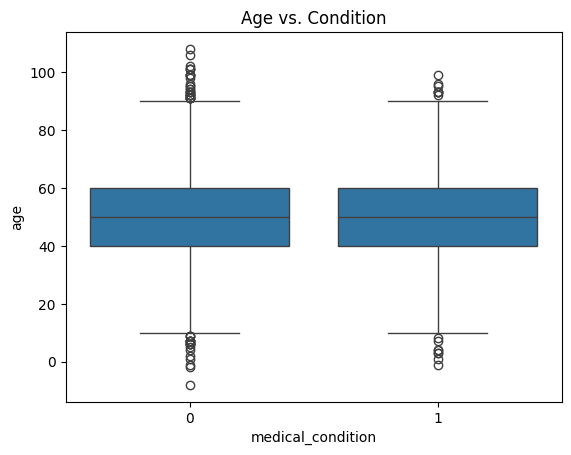

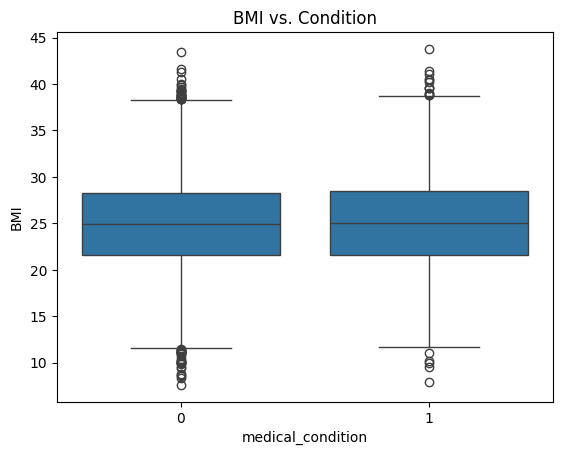

In [96]:
# Visualiztion of Cholesterol levels and Medical_condition
sns.boxplot(x='medical_condition', y='cholesterol', data=df2)
plt.title('Cholesterol Levels vs. Medical Condition')
plt.show()

# Visualization of  Age and Medical_condition
sns.boxplot(x='medical_condition', y='age', data=df2)
plt.title('Age vs. Condition')
plt.show()

# Visualization of BMI and Medical_condition
sns.boxplot(x='medical_condition', y='BMI', data=df2)
plt.title('BMI vs. Condition')
plt.show()

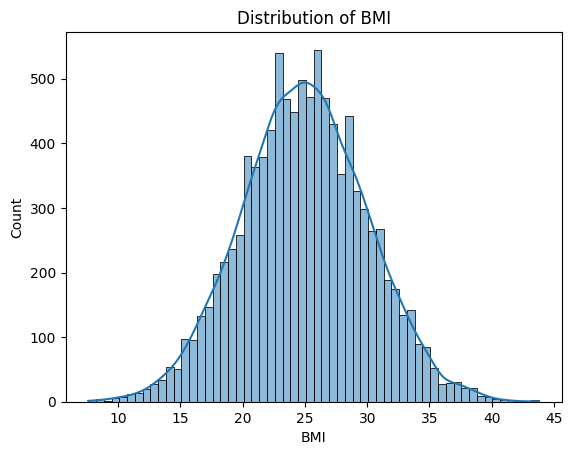

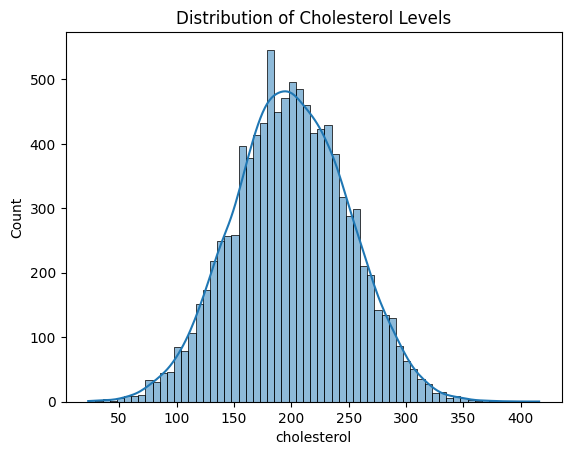

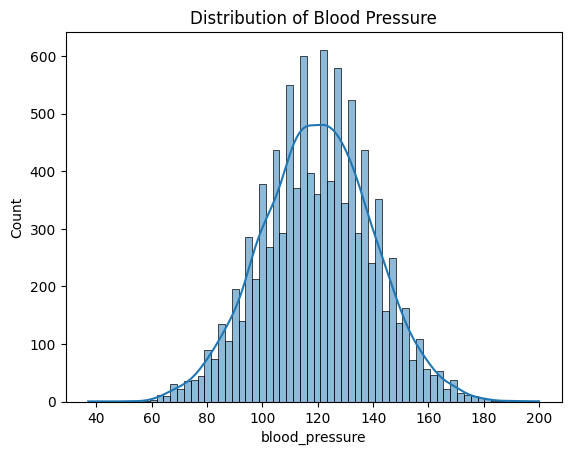

In [97]:
# Visualization of the distribution of BMI
sns.histplot(df2['BMI'], kde=True)
plt.title('Distribution of BMI')
plt.show()

# Visualization of the distribution of cholesterol levels
sns.histplot(df2['cholesterol'], kde=True)
plt.title('Distribution of Cholesterol Levels')
plt.show()

# Visualization of the distribution of blood pressure
sns.histplot(df2['blood_pressure'], kde=True)
plt.title('Distribution of Blood Pressure')
plt.show()


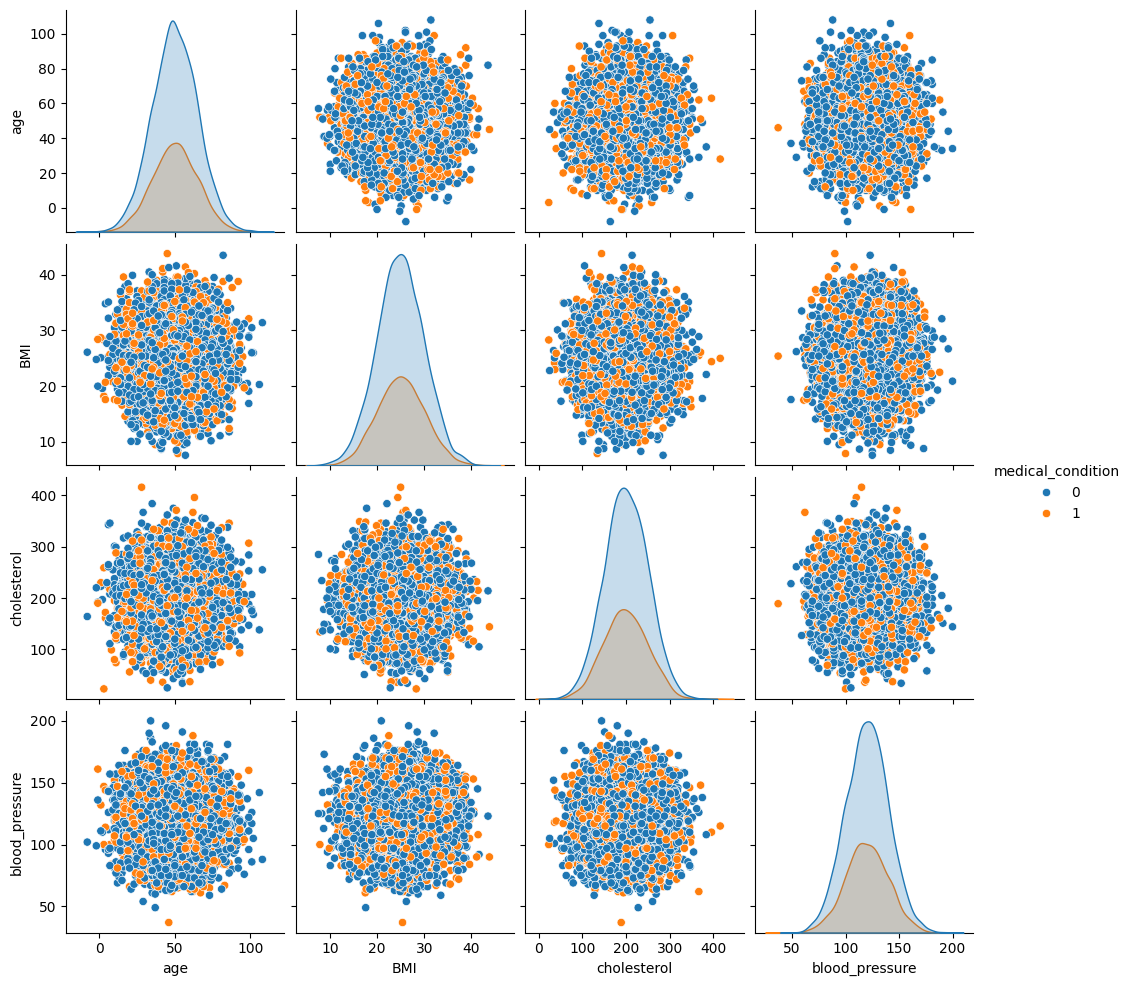

In [98]:
# Pair plot to explore relationships between health features
sns.pairplot(df2, hue='medical_condition', vars=['age', 'BMI', 'cholesterol', 'blood_pressure'])
plt.show()


In [99]:
from sklearn.linear_model import LogisticRegression

X = df2.drop(columns='medical_condition')
y = df2['medical_condition']

model = LogisticRegression(max_iter=1000)

rfe = RFE(model, n_features_to_select=5) # Initialize RFE, selecting the top 5 features
rfe = rfe.fit(X, y)

selected_features_rfe = X.columns[rfe.support_]  # Get the names of the selected features
print("Top 5 features selected by Recursive Feature Elimination:", selected_features_rfe)


Top 5 features selected by Recursive Feature Elimination: Index(['BMI', 'cholesterol', 'blood_pressure', 'smoking_habits',
       'physical_activity'],
      dtype='object')


**Explain how RFE works and why it is effective for feature selection.

Ans: RFE works, with the help of training model & by ranking importance of each individual feature based on models coefficients. It removes the least important features recursivily and retrains model on remaining set until the no. of desired features are left.
It is effective for the reason that it considers importance of feature within the context of dataset. It lookstakes into consideration that0 how the features of the model interact and contribute towards the performance of the model, which ultimately allows more comprehensive selection than an individual correlations.

*** Compare the selected features from RFE with the original feature set and discuss how dimensionality reduction could improve model performance.
Ans:
By reducing the number of features for a model, we can improve model performance with the help of reducing overfitting, Speeding up training and evaluation or simplifying the model, which can result to a better generalization of the model.


In [100]:
from sklearn.feature_selection import mutual_info_classif

X = df2.drop(columns='medical_condition')
y = df2['medical_condition']
info_gain = mutual_info_classif(X, y)

# Rank the features based on information gain
info_gain_df = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gain})
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)

# Select the top 5 features
top_5_info_gain_features = info_gain_df['Feature'].head(5)
print("Top 5 features based on Information Gain:", top_5_info_gain_features)


Top 5 features based on Information Gain: 0                  age
3       blood_pressure
2          cholesterol
1                  BMI
5    physical_activity
Name: Feature, dtype: object


***Discuss why entropy is useful for feature selection and how it helps in identifying the most
informative features


Ans:
Entropy is useful for feature selection for the reason that it measures amount of randomness or uncertainty in the data. Features which helps reduce an entropy the most which results in providing the most information are definitely considered more important ones.

Information Gain which helps with the evaluation of how much of a feature helps in order to distinguish between different classes. Here they are in , 0 = Which has no condition, 1 =  which has a condition.

With the help of methods which are based on entropy helps us to identify the most informative features among the other available features, which might not be the ones which have the highest linear correlation but are still very useful for classification tasks.

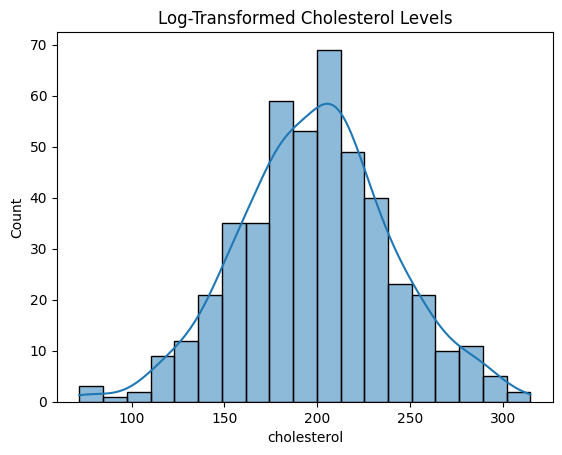

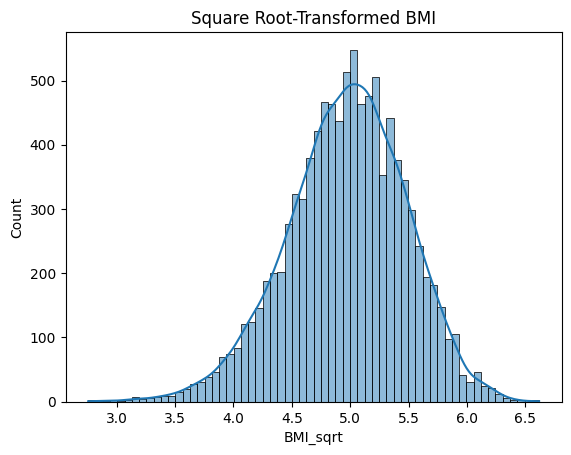

In [103]:

# Apply log transformation to cholesterol levels
df2['cholesterol_log'] = np.log(df2['cholesterol'] + 1)  # Adding 1 to avoid log(0)

# Apply square root transformation to BMI
df2['BMI_sqrt'] = np.sqrt(df2['BMI'])

# Visualize the transformed features
sns.histplot(df['cholesterol'], kde=True)
plt.title('Log-Transformed Cholesterol Levels')
plt.show()

sns.histplot(df2['BMI_sqrt'], kde=True)
plt.title('Square Root-Transformed BMI')
plt.show()




**Discuss the impact of these transformations on the distributions and the correlation between features.
Visualize the transformed features and explain why the transformation was applied **bold text**



Ans:
Applying the Log/Square Root Transformations to Skewed Features
Some of the features can be highly skewed, for example, cholesterol, BMI, etc. With the help of applying a log or square root transformation which can help to reduce skewness of the model which can make the distribution more normal, which ultimately improve model performance.
Impact of Transformations:
Log transformation are the transformations which compresses the range of large values and makes the distribution more symmetric and reduces the effect of extreme outliers on the model.
Square root transformation helps reduces te right skewness of the model, which makes the data closer to a normal distribution.

***Compare the features selected using RFE with those identified by entropy-based feature selection.
–




Ans:
 Comparision of  RFE and Entropy-Based Feature Selection:
A RFE considersgives an importance to the feature importance in the context of a specific model in this case it;s logistic regression which makes the selection of the features which help us optimize the corresponding model.

Entropy-based selection gives an importance to the features considering feature's ability to provide an information which helps with us distinguishes between different target classes. Entropy based selecton search for features which helps reduce uncertainty about the target variable.






*** Discuss how the two approaches differ and why they might select different features for prediction
purposes



Ans:
They might select diffferent features for prediction for the reason that
RFE can select that features which interact well with other features in the context of the model, where information gain gives an inportance to the features or rank the features depending on their  respective individual ability to distinguish between  the target classes.

Information gain is considerd to be a model agnostic, while RFE is considered to be a model specific, which explains the reason that why information gain and RFE might select different sets of features.

***